In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn import metrics
from keras import backend as K

In [2]:
# 定義
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [4]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 128)         0

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',precision, recall])
history = model.fit(x_train, y_train, epochs=10, batch_size=54, verbose=1)

Epoch 1/10
926/926 [==============================] - 57s 61ms/step - loss: 1.4375 - acc: 0.4742 - precision: 0.6408 - recall: 0.2688
Epoch 2/10
926/926 [==============================] - 56s 61ms/step - loss: 1.0040 - acc: 0.6463 - precision: 0.7745 - recall: 0.5140
Epoch 3/10
926/926 [==============================] - 57s 61ms/step - loss: 0.8333 - acc: 0.7082 - precision: 0.8102 - recall: 0.6075
Epoch 4/10
926/926 [==============================] - 57s 61ms/step - loss: 0.7207 - acc: 0.7488 - precision: 0.8306 - recall: 0.6665
Epoch 5/10
926/926 [==============================] - 57s 61ms/step - loss: 0.6354 - acc: 0.7771 - precision: 0.8488 - recall: 0.7104
Epoch 6/10
926/926 [==============================] - 57s 61ms/step - loss: 0.5689 - acc: 0.8005 - precision: 0.8602 - recall: 0.7422
Epoch 7/10
926/926 [==============================] - 56s 61ms/step - loss: 0.5076 - acc: 0.8213 - precision: 0.8728 - recall: 0.7739
Epoch 8/10
926/926 [==============================] - 56s 61ms

In [6]:
loss, accuracy,precision_R, recall_R = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)
print('Precision:', precision_R)
print('Recall:', recall_R)
F1 = 2 * (precision_R * recall_R) / (precision_R + recall_R)
print('F1',F1)

313/313 [==============================] - 3s 9ms/step - loss: 0.7044 - acc: 0.7754 - precision: 0.8191 - recall: 0.7396
Loss: 0.7043812870979309
Accuracy: 0.7753999829292297
Precision: 0.8191088438034058
Recall: 0.7396166324615479
F1 0.7773357578334313


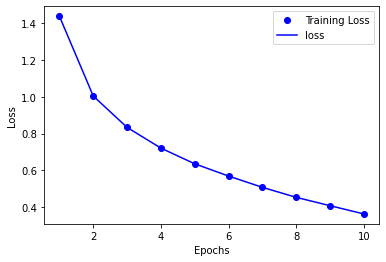

In [7]:
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label ="Training Loss")
plt.plot(epochs, history.history['loss'], 'b', label='loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

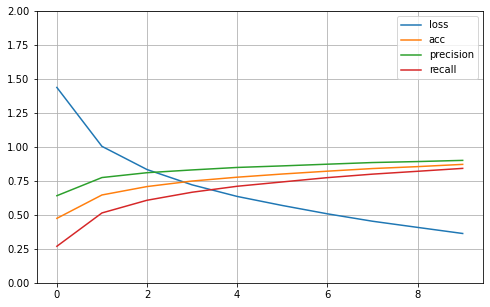

In [8]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()